## Research Question: How has the covid-19 vaccination impacted the death rates and new reported cases rates in the United States?

### Prepare Data

In [63]:
import pandas as pd                           
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
import plotly.graph_objects as go
%matplotlib inline 

url ="/Users/rameasaarna/Desktop/data790/another/owid-covid-data 2.csv"
df = pd.read_csv(url, header=0, low_memory=False) 
usa_covid = df[(df['location']=='United States') & (df["date"] >= "2020-12-12"  )] 

covid = usa_covid[["location", "date","population", "total_deaths",  "new_deaths","total_cases", "new_cases",
                   "people_vaccinated", "people_fully_vaccinated", "total_boosters", "new_vaccinations","people_fully_vaccinated_per_hundred", "new_deaths_per_million", "new_cases_per_million"]]
covid.head(10)


,location,date,population,total_deaths,new_deaths,total_cases,new_cases,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,people_fully_vaccinated_per_hundred,new_deaths_per_million,new_cases_per_million
157547,United States,2020-12-12,332915074.0,301806.0,2533.0,16217826.0,222438.0,NaN,NaN,NaN,NaN,NaN,7.609,668.152
157548,United States,2020-12-13,332915074.0,303465.0,1659.0,16409655.0,191829.0,24126.0,5527.0,NaN,NaN,0.0,4.983,576.210
157549,United States,2020-12-14,332915074.0,305114.0,1649.0,16621674.0,212019.0,28518.0,5645.0,NaN,4551.0,0.0,4.953,636.856
157550,United States,2020-12-15,332915074.0,308101.0,2987.0,16844857.0,223183.0,75860.0,5904.0,NaN,49669.0,0.0,8.972,670.390
157551,United States,2020-12-16,332915074.0,311834.0,3733.0,17081639.0,236782.0,230203.0,6369.0,NaN,159726.0,0.0,11.213,711.238
157552,United States,2020-12-17,332915074.0,315284.0,3450.0,17320602.0,238963.0,495449.0,7107.0,NaN,272354.0,0.0,10.363,717.790
157553,United States,2020-12-18,332915074.0,318226.0,2942.0,17571084.0,250482.0,902953.0,8302.0,NaN,416036.0,0.0,8.837,752.390
157554,United States,2020-12-19,332915074.0,320980.0,2754.0,17769865.0,198781.0,1080791.0,9345.0,NaN,181756.0,0.0,8.272,597.092
157555,United States,2020-12-20,332915074.0,322749.0,1769.0,17963277.0,193412.0,1184011.0,10042.0,NaN,105149.0,0.0,5.314,580.965
157556,United States,2020-12-21,332915074.0,324546.0,1797.0,18164176.0,200899.0,1559051.0,11516.0,NaN,381557.0,0.0,5.398,603.454


### Inspect data

In [64]:
 covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 157547 to 157995
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             449 non-null    object 
 1   date                                 449 non-null    object 
 2   population                           449 non-null    float64
 3   total_deaths                         449 non-null    float64
 4   new_deaths                           449 non-null    float64
 5   total_cases                          449 non-null    float64
 6   new_cases                            449 non-null    float64
 7   people_vaccinated                    448 non-null    float64
 8   people_fully_vaccinated              448 non-null    float64
 9   total_boosters                       205 non-null    float64
 10  new_vaccinations                     447 non-null    float64
 11  people_fully_vaccinated_

### Visualizations 

In [65]:
covid_vaccination = covid.groupby('location')[['total_boosters', "population",'people_vaccinated', 'people_fully_vaccinated']].max().reset_index()


In [66]:
def percentage(x): 
    
    new = (x/332915074.0)*100
    ans = round(new,1)
    return ans

In [67]:
covid_vaccination['%_of_total_boosters'] = covid_vaccination.total_boosters.apply(percentage)
covid_vaccination['%_of_people_vaccinated'] = covid_vaccination.people_vaccinated.apply(percentage)
covid_vaccination['%_of_people_fully_vaccinated'] = covid_vaccination.people_fully_vaccinated.apply(percentage)


In [68]:
covid_vaccination

,location,total_boosters,population,people_vaccinated,people_fully_vaccinated,%_of_total_boosters,%_of_people_vaccinated,%_of_people_fully_vaccinated
0,United States,94925621.0,332915074.0,254002347.0,215274110.0,28.5,76.3,64.7


<AxesSubplot:title={'center':'Percentage of people Vaccinated in United States'}, xlabel=' ', ylabel='percentage (of population)'>

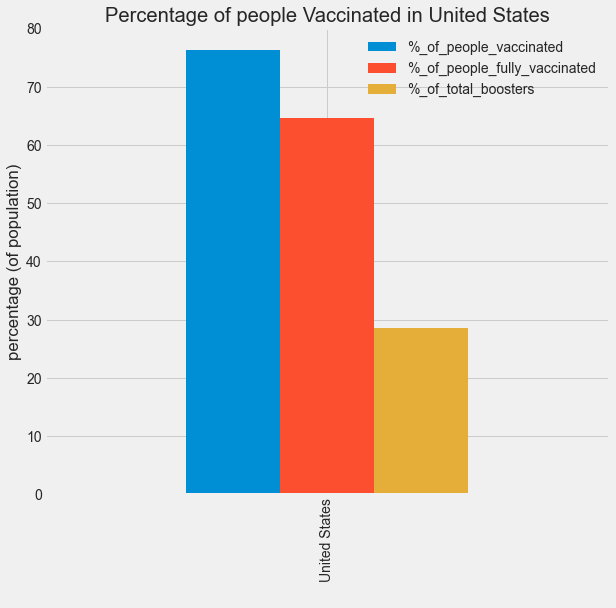

In [69]:
plt.style.use('fivethirtyeight')
covid_vaccination.plot(x="location", y=["%_of_people_vaccinated", '%_of_people_fully_vaccinated', "%_of_total_boosters"], kind="bar",figsize=(9,8),
                       ylabel = "percentage (of population)", xlabel = " ",
                      title = "Percentage of people Vaccinated in United States")


As can be seen, the United States has done an excellent job with immunization, with approximately 76 percent vaccinated, 64 percent completely vaccinated and 28 percent got boosters.

/Users/rameasaarna/opt/anaconda3/envs/data_765/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'New Deaths Per Million')

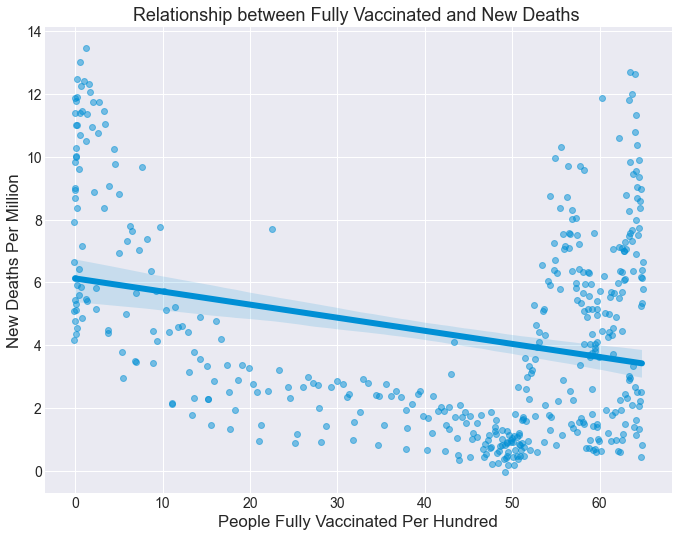

In [70]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))                           

sns.regplot(covid.people_fully_vaccinated_per_hundred, covid.new_deaths_per_million,                                
            x_jitter=0.2, 
            y_jitter=0.2,                                         
            scatter=True,                                         
            fit_reg=True,                                       
            scatter_kws={'alpha':0.5},                       
            marker = 'o') 
ax.set_title('Relationship between Fully Vaccinated and New Deaths ', fontsize = 18)
ax.set_xlabel('People Fully Vaccinated Per Hundred')
ax.set_ylabel('New Deaths Per Million')

According to the graph, covid vaccination helps to reduce death rates in the United States.

/Users/rameasaarna/opt/anaconda3/envs/data_765/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'New Cases Per Million')

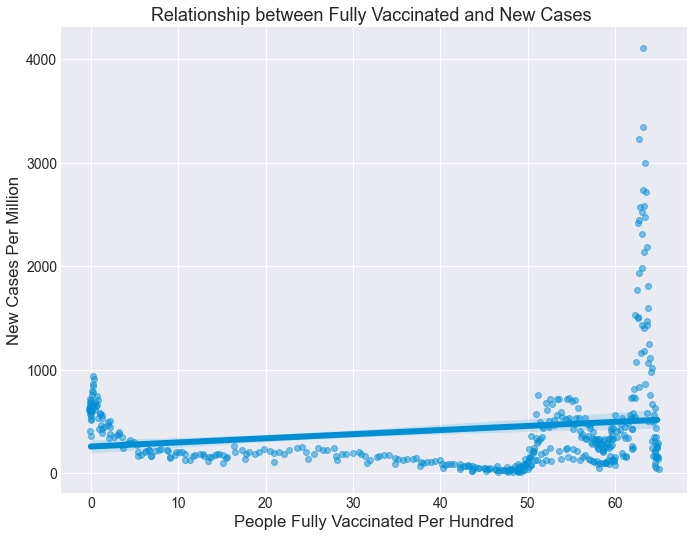

In [71]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(10, 8))                           

sns.regplot(covid.people_fully_vaccinated_per_hundred, covid.new_cases_per_million,                                
            x_jitter=0.2, 
            y_jitter=0.2,                                         
            scatter=True,                                         
            fit_reg=True,                                       
            scatter_kws={'alpha':0.5},                       
            marker = 'o')

ax.set_title('Relationship between Fully Vaccinated and New Cases', fontsize= 18 )

ax.set_title('Relationship between Fully Vaccinated and New Cases ', fontsize = 18)
ax.set_xlabel('People Fully Vaccinated Per Hundred')
ax.set_ylabel('New Cases Per Million')

According to the graph, covid vaccination did not significantly reduce new cases, which are now higher than when immunization began.

### Converting date to datetime object and adding 7- Day Moving Avg of new_deaths and new_cases

In [72]:
usa_covid = df[(df['location']=='United States')]
usa_covid['date'] = pd.to_datetime(usa_covid["date"])
usa_covid['date'] = pd.to_datetime(usa_covid["date"],format = "%m%Y") 

usa_covid['mov_avg_death_cases'] = usa_covid.new_deaths.rolling(7).mean() 
usa_covid['mov_avg_new_cases'] = usa_covid.new_cases.rolling(7).mean()


/Users/rameasaarna/opt/anaconda3/envs/data_765/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rameasaarna/opt/anaconda3/envs/data_765/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rameasaarna/opt/anaconda3/envs/data_765/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is try

No handles with labels found to put in legend.


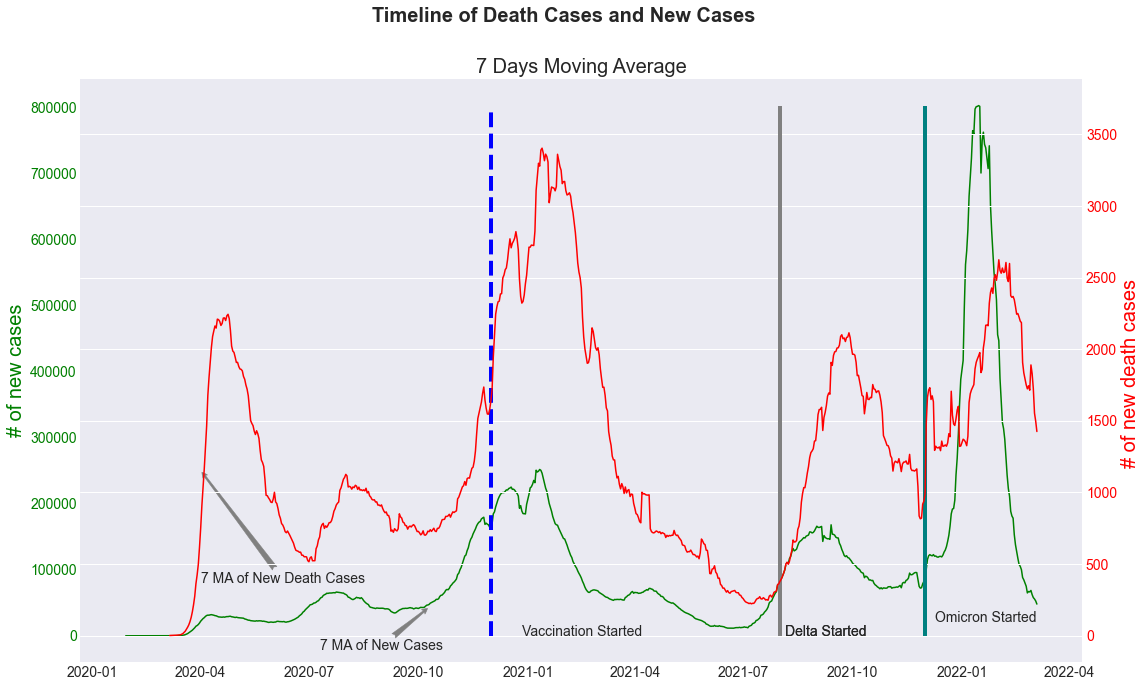

In [74]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize= (16,10))
ax.plot(usa_covid.date, usa_covid.mov_avg_new_cases, color = "green", linewidth = 1.5)

ax.set_ylabel('# of new cases', color = "green", fontsize = 20)
ax.tick_params('y', colors='green')


ax2 = ax.twinx()

ax2.plot(usa_covid.date,usa_covid.mov_avg_death_cases, color = "red",linewidth = 1.5)
ax2.set_ylabel('# of new death cases ', color = "red", fontsize = 20)
ax2.tick_params('y', colors='red')

plt.suptitle("Timeline of Death Cases and New Cases", fontsize = 20, fontweight = "bold",horizontalalignment='center')
plt.title("7 Days Moving Average", fontsize = 20,horizontalalignment='center')


ax2.annotate("7 MA of New Cases", xy=(pd.Timestamp('2020-10-10'), 200),            
             xytext=(pd.Timestamp('2020-07-10'), -100),            
             arrowprops={"arrowstyle":"fancy", "color":"gray"})


ax.annotate("7 MA of New Death Cases", xy=(pd.Timestamp('2020-04-01'), 250000),            
             xytext=(pd.Timestamp('2020-04-01'), 80000),            
             arrowprops={"arrowstyle":"fancy", "color":"gray"})

ax2.annotate("Omicron Started", xy=(pd.Timestamp('2021-12-05'), 900),            
             xytext=(pd.Timestamp('2021-12-09'), 100),            
             )

ax.annotate("Delta Started", xy=(pd.Timestamp('2021-08-15'), 20000),            
             xytext=(pd.Timestamp('2021-08-05'), -200),            
             )

ax.annotate("Delta Started", xy=(pd.Timestamp('2021-08-15'), 20000),            
             xytext=(pd.Timestamp('2021-08-05'), -200),            
             )

ax.annotate("Vaccination Started", xy=(pd.Timestamp('2020-12-01'), 20000),            
             xytext=(pd.Timestamp('2020-12-27'), -200),            
             )


ax.grid()
ax.legend(loc=0)
ax2.vlines(x = "2021-08", ymin = 0, ymax = 3700, 
           colors = 'gray', 
           label = 'delta') 

ax2.vlines(x = "2021-12", ymin = 0, ymax = 3700, 
           colors = 'teal', 
           label = 'delta') 
ax2.vlines(x = "2020-12", ymin = 0, ymax = 3700, 
           colors = 'blue', linestyle= "--",
           label = 'delta') 


Vaccination began in December 2020, as we all know. As can be seen from the graph, vaccination has aided in lowering the number of deaths. However, in terms of new cases, vaccination initially reduced new cases, but as the delta and omicron variants emerged, the number of new cases increased, and in January 2022, the number of new cases in the United States was over 5 times greater than the previous peak.

I intended to demonstrate how covid vaccines affect deaths and new cases. First, I presented a bar chart, which demonstrates that in the United States, more than half of the population is vaccinated, but only less than half receive boosters. Furthermore, I chose a time series graph because it will display the trend of death rates and new cases since covid started, allowing me to discus how covid vaccination impact on death rates and new cases. I've also created two scatter plots that depicts the relationship between new_vaccinations and new cases  & new_vaccinations  and new deaths.

I wanted to visualize death cases and new cases based on immunization status, however I realized my data didn't include that information. Now, because the visualization I made includes both vaccinated and unvaccinated persons, I'm not sure if the majority of those that have covid or died have been vaccinated.